In [8]:
def missing_dates(df):
    # Convert the date column to datetime type if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Get the first and last date
    first_date = df['Date'].min()
    last_date = df['Date'].max()

    # Generate a sequence of all dates between the first and last date
    all_dates = pd.date_range(start=first_date, end=last_date, freq='D')

    # Find the missing dates
    missing_dates = all_dates[~all_dates.isin(df['Date'])]

    if len(missing_dates) == 0:
        return False
    else:
        return True
    


In [9]:
def Fill_Data(Demand):

    Demand.set_index('Date', inplace=True)
    # Resample the dataframe to fill in any missing dates with NaN values
    Demand = Demand.resample('D').asfreq()

    Demand['Order_Demand'] = Demand['Order_Demand'].interpolate(method='linear')

    return Demand

In [10]:
def metrics(prediction, real_values):
    d = real_values - prediction
    mse_f = np.mean(d**2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    r2_f = 1-(sum(d**2)/sum((real_values-np.mean(real_values))**2))

    return mse_f, mae_f, rmse_f, r2_f

In [11]:
# Plot the predicted values
def plot_save(Processed_Demand, predictions, epochs):
    
    name='./Images/LSTM_'+str(epochs)+'.png'
    plt.figure(figsize=(12, 6))
    plt.plot(Processed_Demand.index.values[train_size+1:], Processed_Demand['Order_Demand'].values[train_size+1:], label='Actual')
    plt.plot(Processed_Demand.index.values[train_size+1:], predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Demand (Millions)')
    plt.title('LSTM Prediction')
    plt.legend()
    plt.savefig(name)  # Save the figure as 'figure.png'
    plt.show()

In [12]:
def write(Processed_Demand, predictions, epochs):

    Data_LSTM = pd.DataFrame({'Date': Processed_Demand.index.values[train_size+1:], 'Real Demand': Processed_Demand['Order_Demand'].values[train_size+1:], 'Predicted Demand': predictions.flatten()})
    name='./Output/LSTM_'+str(epochs)+'.csv'
    Data_LSTM.to_csv(name, index=False)

Epoch 1/30
92/92 [==============================] - 4s 2ms/step - loss: 0.0836
Epoch 2/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0378
Epoch 3/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 4/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 5/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 6/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 7/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 8/30
92/92 [==============================] - ETA: 0s - loss: 0.038 - 0s 3ms/step - loss: 0.0377
Epoch 9/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 10/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 11/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 12/30
92/92 [==============================] - 0s 3ms/step - loss: 0.0378
Epoch 13/30
92/92 [======

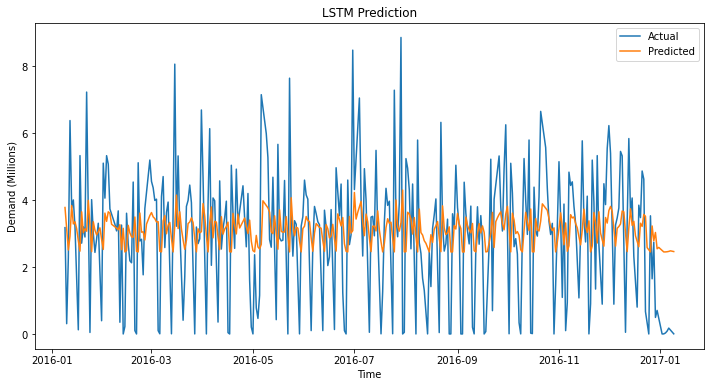

Epoch 1/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 10/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 11/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 12/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 13/100
92/92 [=================

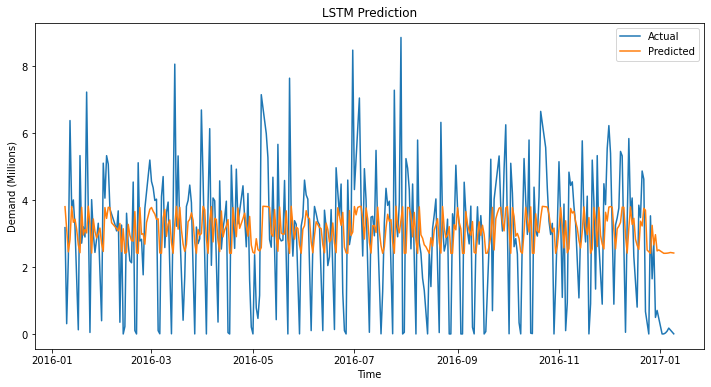

Epoch 1/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 2/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 3/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 4/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 5/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 6/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 7/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 8/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 9/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 10/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0373
Epoch 11/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 12/500
92/92 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 13/500
92/92 [=================

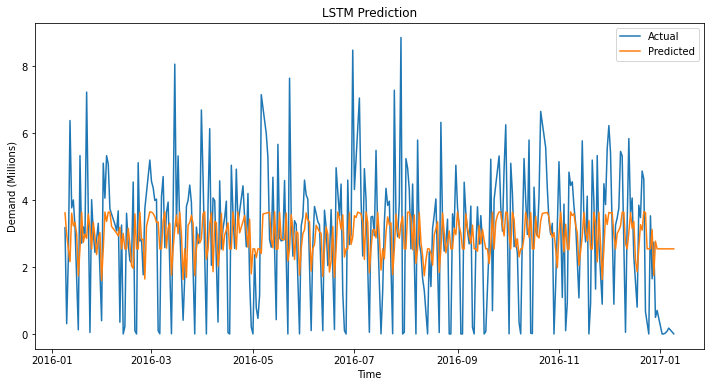

Epoch 1/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 2/1000
92/92 [==============================] - 0s 3ms/step - loss: 0.0366
Epoch 3/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 4/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 5/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 6/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 7/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0365
Epoch 8/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 9/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 10/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0365
Epoch 11/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 12/1000
92/92 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 13/1000
92/92 [====

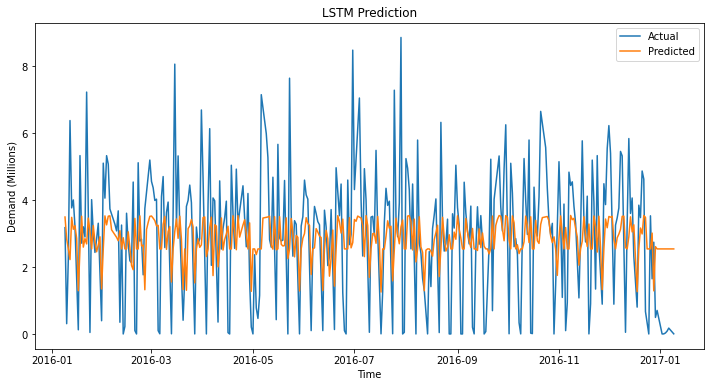

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the data
Demand_raw = pd.read_csv("./Demand_Data.csv")

Demand_raw['Date'] = pd.to_datetime(Demand_raw['Date'])

Demand = Demand_raw.groupby('Date')['Order_Demand'].sum().reset_index()


if missing_dates(Demand) == True:
    Processed_Demand=Fill_Data(Demand)

else:
    Processed_Demand=Demand

Processed_Demand['Order_Demand'] = Processed_Demand['Order_Demand'] / 1000000

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Processed_Demand)

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the train data
train_X, train_y = train_data[:-1], train_data[1:]

# Reshape the data to fit the LSTM input shape (samples, timesteps, features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])

# Create the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(1, train_X.shape[2]), return_sequences=True))
model.add(layers.LSTM(32, activation='relu', return_sequences=True))
model.add(layers.LSTM(16, activation='relu'))
model.add(layers.Dense(train_X.shape[2]))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model

batch_size = 16  # Batch size

for epochs in [30, 100, 500, 1000]:

    model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1)

    # Prepare the test data
    test_X, test_y = test_data[:-1], test_data[1:]
    test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

    # Predict on the test data
    predictions = model.predict(test_X)

    # Inverse scale the predictions
    predictions = scaler.inverse_transform(predictions)

    # Evaluate the model (if you have actual test labels)
    mse = model.evaluate(test_X, test_y, batch_size=batch_size, verbose=0)
    # Print the MSE (Mean Squared Error)
    print("Mean Squared Error:", mse)

    write(Processed_Demand, predictions, epochs)
    plot_save(Processed_Demand, predictions, epochs)